In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


## Import some basics libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Divide the dataset into independent and dependent **feature**

In [6]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y


0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Feature Engineering

In [9]:
# converted into one hot encoded-
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [10]:
## concatenate these variable with dataframe
x.drop(['Geography','Gender'],axis=1)    # axis=1 is used to drop column not rows

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
## To update x
x=x.drop(['Geography','Gender'],axis=1)

In [12]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
pd.concat([x,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
# upadate x
x=pd.concat([x,geography,gender],axis=1)

In [15]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


## Spliting the dataset into Ttraining set and Test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

## Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [19]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [21]:
x_train.shape

(8000, 11)

In [22]:
x_test.shape

(2000, 11)

# Part 2
**Lets create the ANN**

In [23]:
from tensorflow.keras.models import Sequential   #  entire NN as block ,which indicate that we will able to do FP and BP (big block that has NN).
from tensorflow.keras.layers import Dense   # Dense layer able to create hindden layers ,input layers and output layers.
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU ## Activation function.
from tensorflow.keras.layers import Dropout  # To reduce overfittig by deactivate the neuron.

## **Lets intialize the ANN**

In [24]:
classifier=Sequential()

## Adding the Input Layers

In [25]:
classifier.add(Dense(units=11,activation='relu'))

## Adding the first hidden layers

In [26]:
classifier.add(Dense(units=7,activation='relu'))

## **Adding the second hidden layers**

In [27]:
classifier.add(Dense(units=6,activation='relu'))

## **Adding the output layers**

In [28]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [29]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
## by defoult Adam uses 0.01 learning Rate

In [30]:
## for own learning rate
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)


In [31]:
# some opt can use at adam
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

## Train neuron network

In [32]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.4106 - accuracy: 0.8218 - val_loss: 0.4008 - val_accuracy: 0.8190
Epoch 2/1000
526/536 [============================>.] - ETA: 0s - loss: 0.3664 - accuracy: 0.8447

KeyboardInterrupt: 

## **Early Stopping**

In [33]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [34]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping) ## for 1000 epoch uses early stopping

Epoch 1/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3571 - accuracy: 0.8517 - val_loss: 0.3648 - val_accuracy: 0.8497
Epoch 2/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3510 - accuracy: 0.8543 - val_loss: 0.3597 - val_accuracy: 0.8501
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3484 - accuracy: 0.8554 - val_loss: 0.3629 - val_accuracy: 0.8493
Epoch 4/1000
536/536 [==============================] - 5s 10ms/step - loss: 0.3447 - accuracy: 0.8580 - val_loss: 0.3630 - val_accuracy: 0.8478
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3443 - accuracy: 0.8574 - val_loss: 0.3613 - val_accuracy: 0.8519
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3425 - accuracy: 0.8587 - val_loss: 0.3601 - val_accuracy: 0.8516
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3403 - accuracy: 0.8586 - val_loss: 0.3628 - val_accuracy

In [35]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

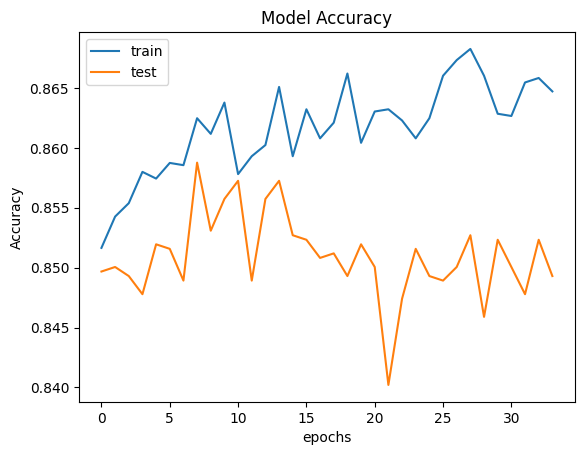

In [36]:
#Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epochs")
plt.legend(['train','test'],loc="upper left")
plt.show()


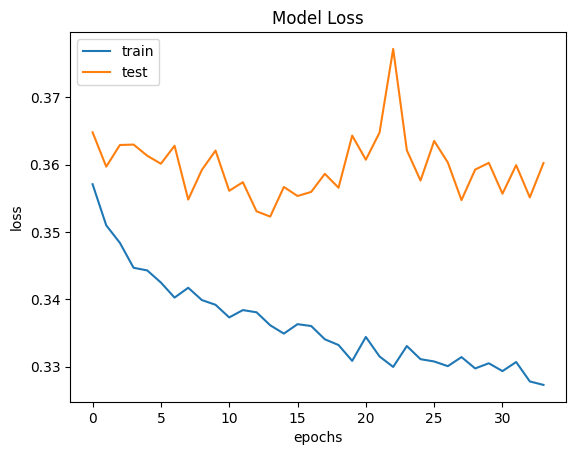

In [37]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(['train','test'],loc="upper left")
plt.show()

## **Part 3 - Making the prediction and evalution the model**


In [38]:
#Predicting the test set results
y_pred=classifier.predict(x_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [39]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1500,   95],
       [ 190,  215]])

In [40]:
# calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [41]:
score

0.8575

In [43]:
## Get the weights
classifier.get_weights()

[array([[ 3.27406853e-01,  1.27763784e+00, -2.20313355e-01,
          4.68575619e-02, -4.33951616e-01,  2.98068523e-01,
         -5.73033504e-02, -5.08273184e-01,  2.94145584e-01,
         -1.14417605e-01, -1.99121997e-01],
        [-2.75844049e+00, -2.52151489e+00,  1.26805687e+00,
         -4.33487225e+00, -5.78761697e-01, -3.37817478e+00,
          5.64072073e-01,  4.36924547e-01, -3.72941065e+00,
         -5.02239764e-01,  4.94082987e-01],
        [ 5.33454001e-01, -2.58955695e-02,  7.79481113e-01,
          6.36115015e-01,  1.71437889e-01, -7.56711125e-01,
         -1.31301120e-01, -2.45963514e-01,  4.62099403e-01,
         -1.56083688e-01, -1.65879905e+00],
        [ 1.75609607e-02, -7.00612783e-01, -2.00135231e+00,
         -5.73228180e-01, -3.04876518e+00, -1.01813471e+00,
         -5.29894978e-02,  1.14275694e+00,  1.89848006e+00,
          3.88537318e-01,  2.23861448e-02],
        [-5.90747446e-02, -2.64030576e-01,  5.95950186e-01,
          5.89975297e-01, -3.78294802e+00,  